In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
cancer = pd.read_csv('/content/breast-cancer.csv');

In [ ]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,2,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,2,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,2,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,2,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,2,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
cancer["diagnosis"]=cancer["diagnosis"].map({"B": 1, "M": 2})
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,2,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
 # Разделение данных на признаки (X) и целевую переменную (y)
 X = cancer.drop(columns=['diagnosis'])  # признаки (все столбцы, кроме 'diagnosis')
 y = cancer['diagnosis']  # целевая переменная ('diagnosis')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("Inputs X (train/test):", X_train.shape, X_test.shape)

print("Outputs Y (train/test):", y_train.shape, y_test.shape)

Inputs X (train/test): (398, 31) (171, 31)
Outputs Y (train/test): (398,) (171,)


In [ ]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: diagnosis, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)


print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.953


In [ ]:
from sklearn.linear_model import LogisticRegression
# C - default 1.0
clf1 = LogisticRegression(random_state=0).fit(X_train, y_train)
print("Правильность на обучающем наборе: {}".format(clf1.score(X_train, y_train)))
print("Правильность на тестовом наборе: {}".format(clf1.score(X_test, y_test)))


Правильность на обучающем наборе: 0.6206030150753769
Правильность на тестовом наборе: 0.6432748538011696


In [ ]:
#C=100
print('C=100')
clf = LogisticRegression(random_state=0, C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе C = 100: {}".format(clf.score(X_train, y_train)))
print("Правильность на тестовом наборе C = 100: {}".format(clf.score(X_test, y_test)))
#C=0.01
print('C=0.01')
clf = LogisticRegression(random_state=0, C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе C = 0.01: {}".format(clf.score(X_train, y_train)))
print("Правильность на тестовом наборе C = 0.01: {}".format(clf.score(X_test, y_test)))

C=100
Правильность на обучающем наборе C = 100: 0.6206030150753769
Правильность на тестовом наборе C = 100: 0.6432748538011696
C=0.01
Правильность на обучающем наборе C = 0.01: 0.6206030150753769
Правильность на тестовом наборе C = 0.01: 0.6432748538011696


In [ ]:
#модель L2-регуляризации
print('l2, C=0.1')
clf = LogisticRegression(random_state=0, penalty='l2', C=0.1).fit(X_train, y_train)
print("Правильность на обучающем наборе l2: {}".format(clf.score(X_train, y_train)))
print("Правильность на тестовом наборе l2: {}".format(clf.score(X_test, y_test)))

l2, C=0.1
Правильность на обучающем наборе l2: 0.6206030150753769
Правильность на тестовом наборе l2: 0.6432748538011696


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [ ]:
valid_pred = clf1.predict(X_test)
ac_score = accuracy_score(y_test, valid_pred)
print("Accuracy score:", ac_score)
print("Precision score:", precision_score(y_test, valid_pred))
print("Recall score:", recall_score(y_test, valid_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, valid_pred))

Accuracy score: 0.6432748538011696
Precision score: 0.6432748538011696
Recall score: 1.0
Confusion matrix:
 [[110   0]
 [ 61   0]]


In [ ]:
# модель метода опорных векторов SVC()
from sklearn.svm import SVC
clf2 = SVC( random_state=17).fit(X_train, y_train)
print("Правильность на обучающем наборе: {}".format(clf2.score(X_train, y_train)))
print("Правильность на тестовом наборе: {}".format(clf2.score(X_test, y_test)))

Правильность на обучающем наборе: 0.6206030150753769
Правильность на тестовом наборе: 0.6432748538011696


In [ ]:
from sklearn.model_selection import GridSearchCV

SVC_params = {"C": [0.1, 1], "gamma": [0.2,0.6]}
SVC_grid = GridSearchCV(clf2, SVC_params, cv=5, n_jobs=-1)
svc_model = SVC_grid.fit(X_train, y_train)

print(SVC_grid.best_score_, SVC_grid.best_params_)


0.6206012658227849 {'C': 0.1, 'gamma': 0.2}


In [ ]:
valid_pred = svc_model.predict(X_test)
ac_score = accuracy_score(y_test, valid_pred)
print("Accuracy score:", ac_score)
print("Precision score:", precision_score(y_test, valid_pred))
print("Recall score:", recall_score(y_test, valid_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, valid_pred))

Accuracy score: 0.6432748538011696
Precision score: 0.6432748538011696
Recall score: 1.0
Confusion matrix:
 [[110   0]
 [ 61   0]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
first_knn = KNeighborsClassifier(n_neighbors=6)
knn_model = first_knn.fit(X_train, y_train)

X_test = np.ascontiguousarray(X_test)
knn_valid_pred = knn_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, knn_valid_pred)
ac_score = accuracy_score(y_test, knn_valid_pred)
print("Accuracy score:", ac_score)
print("Precision score:", precision_score(y_test, valid_pred))
print("Recall score:", recall_score(y_test, valid_pred))
print("Confusion matrix:")
print(confusion_mat)

Accuracy score: 0.783625730994152
Precision score: 0.6432748538011696
Recall score: 1.0
Confusion matrix:
 [[110   0]
 [ 61   0]]
Confusion matrix:
[[110   0]
 [ 37  24]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6,random_state=0)
tree_model = tree.fit(X_train, y_train)
valid_pred = tree_model.predict(X_test)
ac_score = accuracy_score(y_test, valid_pred)
print("Accuracy score:", ac_score)
print("Precision score:", precision_score(y_test, valid_pred))
print("Recall score:", recall_score(y_test, valid_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, valid_pred))

Accuracy score: 0.9590643274853801
Precision score: 0.9478260869565217
Recall score: 0.990909090909091
Confusion matrix:
 [[109   1]
 [  6  55]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


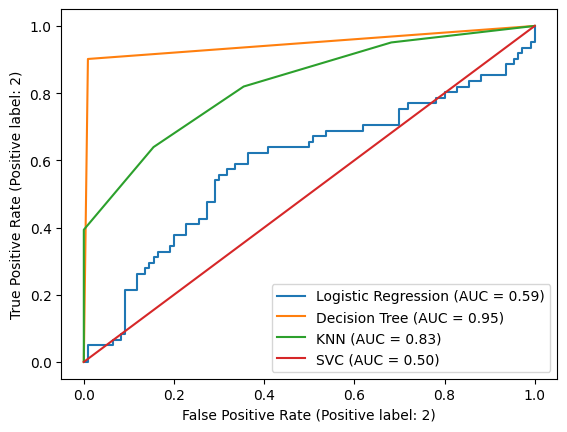

In [ ]:

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

ax = plt.gca()


models = [clf1, tree_model, knn_model, svc_model]
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVC']

for model, name in zip(models, model_names):
    disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, name=name)

plt.show()

